In [1]:
pip install torch

  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.11.0 which is incompatible.


In [2]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [4]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

fatal: destination path 'PlantVillage-Dataset' already exists and is not an empty directory.


In [5]:
# Access the cloned repository
import os
repository_path = "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw"
os.chdir(repository_path)

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


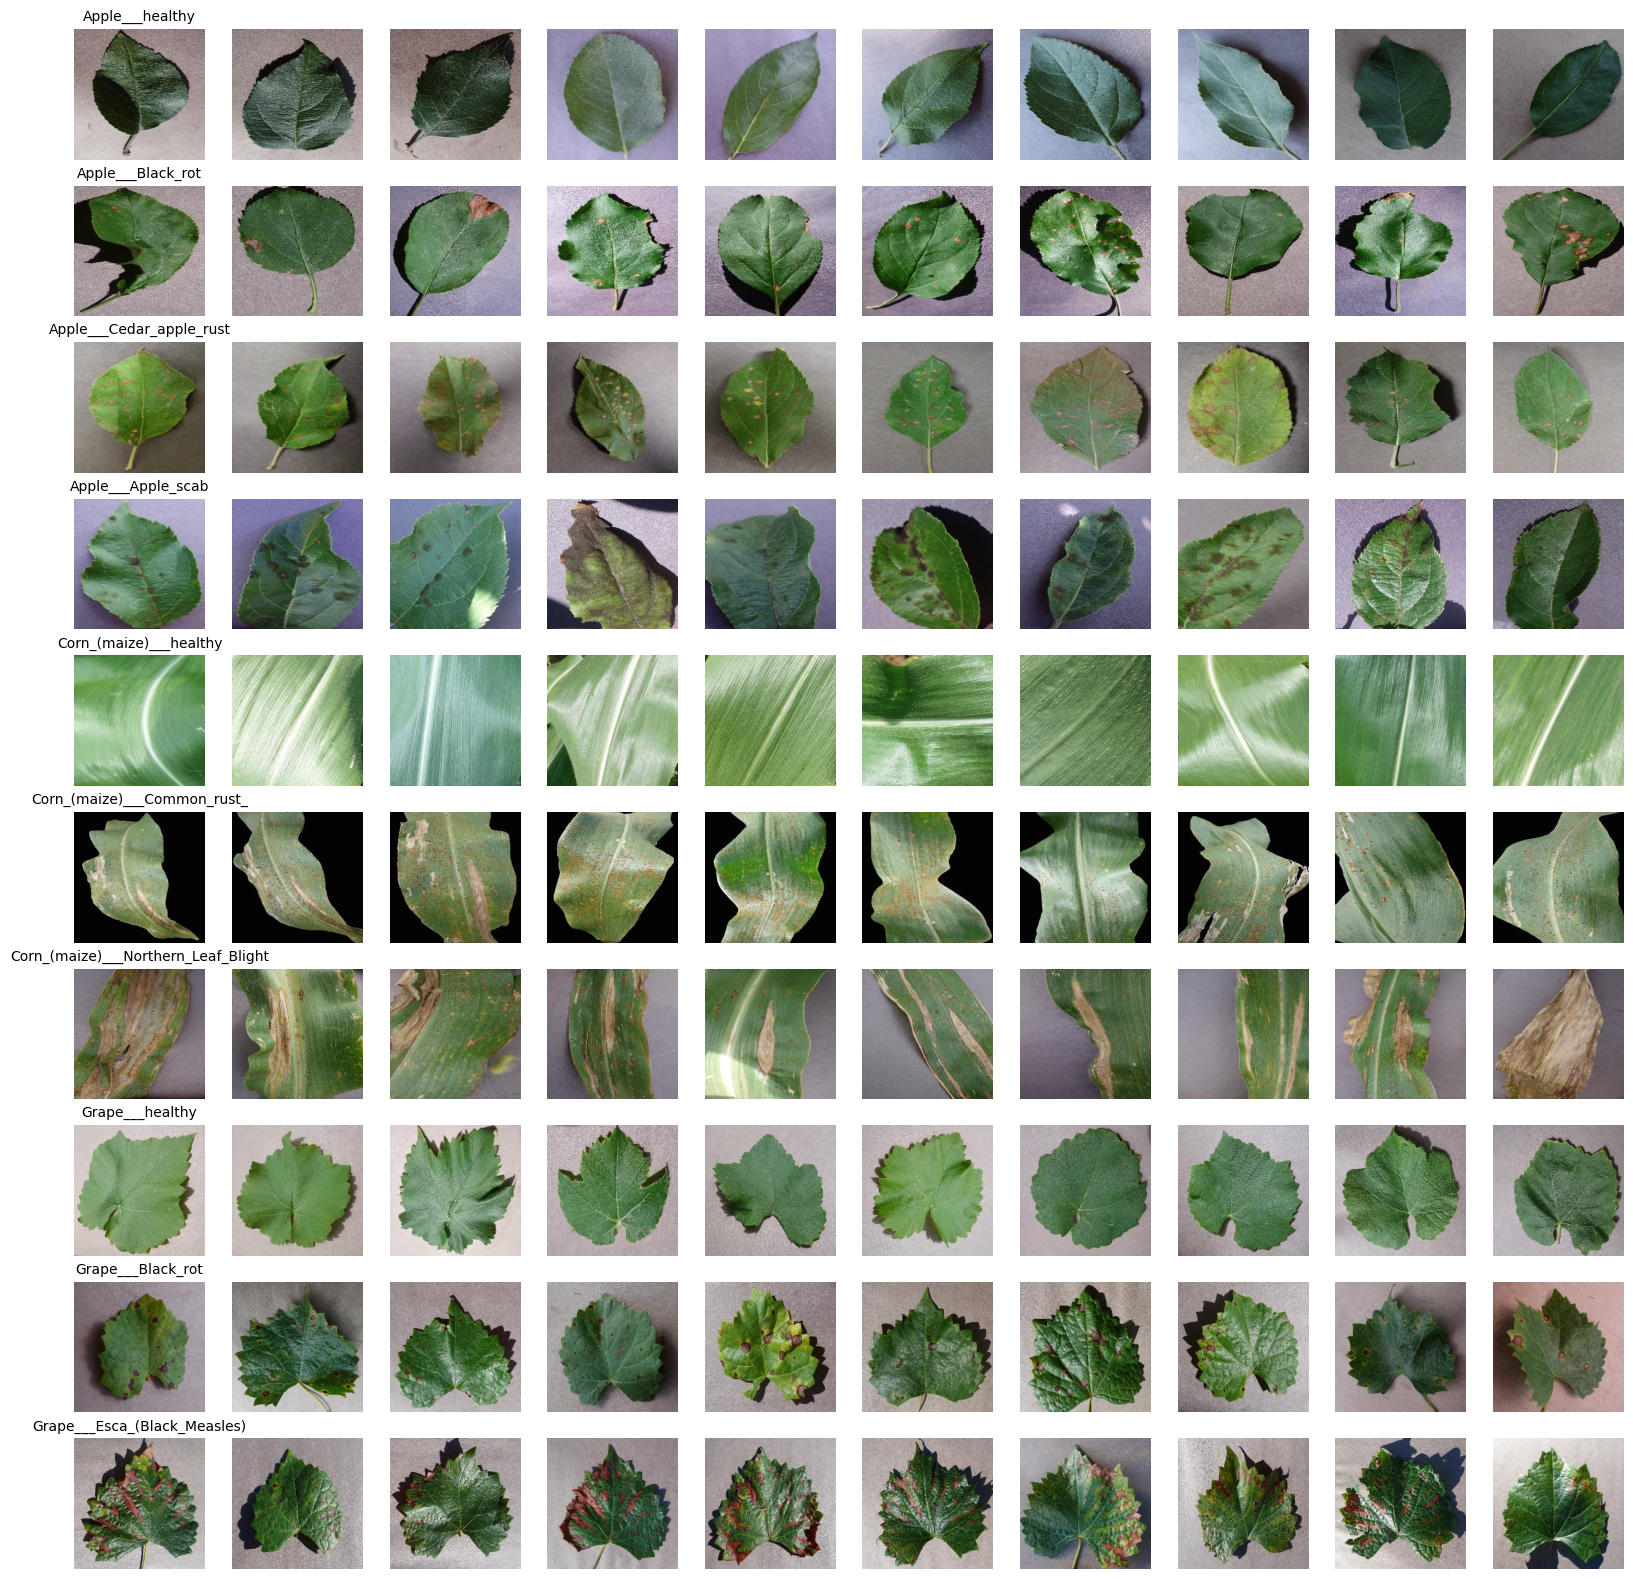

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob

# Define the list of folders
folders = ["C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Apple___healthy",
            "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Apple___Black_rot",
            "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Apple___Cedar_apple_rust",
            "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Apple___Apple_scab",
            "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Corn_(maize)___healthy",
            "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Corn_(maize)___Common_rust_",
            "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Corn_(maize)___Northern_Leaf_Blight",
            "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Grape___healthy",
            "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Grape___Black_rot",
            "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color/Grape___Esca_(Black_Measles)"]

# Define the number of images to display from each folder
num_images = 10

# Create a figure
fig = plt.figure(figsize=(20, 20))

# Iterate over each folder
for i, folder in enumerate(folders):
    # List all files in the folder
    image_files = glob.glob(os.path.join(folder, '*'))

    # Filter out directories
    image_files = [f for f in image_files if os.path.isfile(f)]

    # Iterate over each image file
    for j, image_file in enumerate(image_files[:num_images]):
        # Open the image
        image = Image.open(image_file)

        # Add a subplot to the figure
        ax = fig.add_subplot(len(folders), num_images, i*num_images + j + 1)

        # Display the image
        ax.imshow(image)

        # Turn off axis
        ax.axis('off')

        # Add a label to the image
        if j == 0:
            ax.set_title(folder.split('/')[-1], fontsize=10)

# Show the figure
plt.show()


In [8]:
import os

# Get the current working directory
cwd = "C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/"

# List all folders in the current working directory
folders = [f for f in os.listdir(cwd) if os.path.isdir(os.path.join(cwd, f))]

# Print the list of folders
print(folders)

['color', 'grayscale', 'segmented']


In [9]:
pip install tensorflow

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.2 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.


In [10]:
!pip install -U scikit-learn

In [11]:
import os
import numpy as np
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import scipy

# Define the image dimensions
img_width, img_height = 150, 150

# Define the data directories
data_dirs = ['C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/grayscale',
             'C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/segmented',
             'C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/raw/color']

# Define the directories for the training, validation and test splits
train_dir = 'C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/model/train'
val_dir = 'C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/model/val'
test_dir = 'C:/Users/LvlyPavi/Downloads/PlantVillage-Dataset/model/test'

# Create the directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split the data into training, validation and test sets
for data_dir in data_dirs:
    for class_dir in os.listdir(data_dir):
        os.makedirs(os.path.join(train_dir, class_dir), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_dir), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_dir), exist_ok=True)

        class_files = os.listdir(os.path.join(data_dir, class_dir))
        np.random.shuffle(class_files)

        train_files, test_files = train_test_split(class_files, test_size=0.2, random_state=42)
        train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

        for file in train_files:
            shutil.copy(os.path.join(data_dir, class_dir, file), os.path.join(train_dir, class_dir, file))
        for file in val_files:
            shutil.copy(os.path.join(data_dir, class_dir, file), os.path.join(val_dir, class_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(data_dir, class_dir, file), os.path.join(test_dir, class_dir, file))

In [12]:
!pip uninstall tensorflow keras scipy -y
!pip install tensorflow keras scipy

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0
Found existing installation: keras 2.13.1
Uninstalling keras-2.13.1:
  Successfully uninstalled keras-2.13.1
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1


You can safely remove it manually.
You can safely remove it manually.


  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl (1.9 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)


In [13]:
# Define the number of epochs, batch size, and steps per epoch
epochs = 20
batch_size = 32
num_classes = len(os.listdir(train_dir))

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Added dropout

model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Added dropout

model.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Added dropout

model.add(Conv2D(256, (3, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Added dropout

model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes)) 
model.add(Activation('softmax'))



# Define the ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Added vertical flip
    rotation_range=20)  # Added rotation

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Add learning rate schedule
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
callbacks_list = [lr_schedule]

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks_list)

# Print the accuracy of the model after training
print(f"The accuracy of the model after training is: {history.history['accuracy'][-1]:.4f}")

Found 104630 images belonging to 38 classes.
Found 64596 images belonging to 38 classes.
Epoch 1/20
3269/3269 [==============================] - 2482s 759ms/step - loss: 3.3415 - accuracy: 0.4538 - val_loss: 3.3826 - val_accuracy: 0.4139 - lr: 0.0010
Epoch 2/20
3269/3269 [==============================] - 2060s 630ms/step - loss: 2.5794 - accuracy: 0.5709 - val_loss: 4.3037 - val_accuracy: 0.3273 - lr: 0.0010
Epoch 3/20
3269/3269 [==============================] - 2135s 653ms/step - loss: 2.2184 - accuracy: 0.6151 - val_loss: 3.0720 - val_accuracy: 0.4656 - lr: 0.0010
Epoch 4/20
3269/3269 [==============================] - 2189s 670ms/step - loss: 2.0649 - accuracy: 0.6374 - val_loss: 2.4722 - val_accuracy: 0.5263 - lr: 0.0010
Epoch 5/20
3269/3269 [==============================] - 2061s 630ms/step - loss: 1.9777 - accuracy: 0.6548 - val_loss: 2.2622 - val_accuracy: 0.5933 - lr: 0.0010
Epoch 6/20
3269/3269 [==============================] - 2050s 627ms/step - loss: 1.9419 - accuracy: 0